In [690]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [691]:
alpha_1 = 1e-3
alpha_2 = 1.44
fk_max = 1
R_k = 0.5
mu = 2
v_1 = 1.2e2
v_2 = 14.4 
gammas = [1, 1e-3, 1e-6]

"""alpha_1 = 3e-4
alpha_2 = 1.2
fk_max = 9
R_k = 0.01
mu = 5
v_1 = 3e2
v_2 = 14.4 *1e-1
gammas = [1, 1e-3, 1e-6]"""

'alpha_1 = 3e-4\nalpha_2 = 1.2\nfk_max = 9\nR_k = 0.01\nmu = 5\nv_1 = 3e2\nv_2 = 14.4 *1e-1\ngammas = [1, 1e-3, 1e-6]'

In [692]:
def kill_function(R):
     f = fk_max*(R/(R + R_k))

     return f


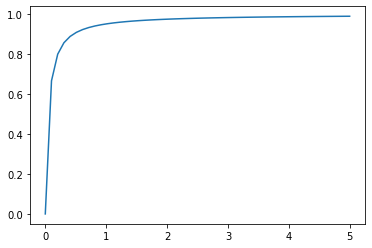

In [693]:
x = np.linspace(0, 5, 50)
f = []
for i in range(len(x)):
    f_i = kill_function(i)
    f.append(f_i)
plt.plot(x, f)
plt.show()


In [694]:
def model(t, z, gamma):

    dAdt = -alpha_1*(1 - z[1])*z[0]*z[2] + alpha_2*gamma*z[1]*z[2]
    dRdt = (alpha_1/gamma)*(1 - z[1])*z[0] - alpha_2*z[1]
    dSdt = -kill_function(z[1])*z[3]
    dCdt = v_1*(mu - z[3])*(z[2] - z[3]) - v_2*z[3] - kill_function(z[1])*z[3]
    dzdt = [dAdt, dRdt, dSdt, dCdt]

    return dzdt

In [695]:
z0 = [1, 0, 1, 0]
t= np.geomspace(0.001, 1, 10000)
t_span = [0.001, 1]
sol = []

for gamma in gammas:
    z = solve_ivp(model, t_span, z0, args = (gamma,), method ='Radau', t_eval = t)
    sol.append(z)

sol1 = sol[0]
sol2 = sol[1]
sol3 = sol[2]

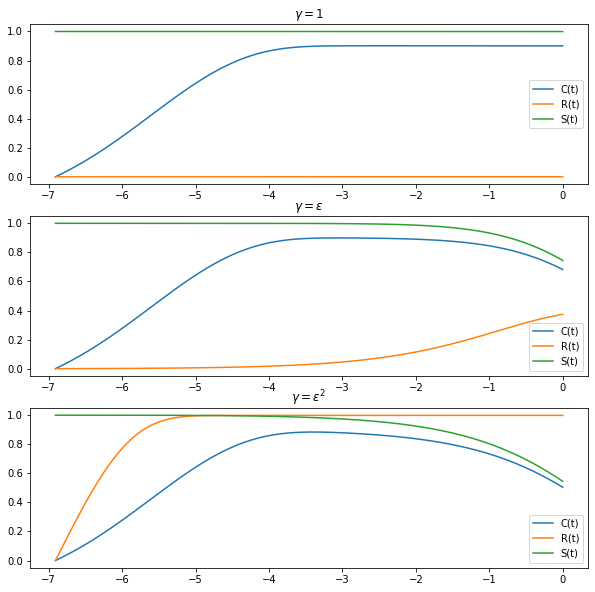

In [696]:
fig, axs = plt.subplots(3, 1, figsize=(10,10))
A = sol1.y[0]
R = sol1.y[1]
S = sol1.y[2]
C = sol1.y[3]

#axs[0].set_xlim([-7, 0])
#axs[1].set_xlim([-7, 0])
#axs[2].set_xlim([-7, 0])

axs[0].plot(np.log(t), C, label = 'C(t)')
axs[0].plot(np.log(t), R, label = 'R(t)')
axs[0].plot(np.log(t), S, label = 'S(t)')
#axs[0].plot(np.log(t), A)
#axs[1].set(xlabel='log(t)')
axs[0].set_title('$\gamma = 1$')
axs[0].legend(loc = 'best')

A = sol2.y[0]
R = sol2.y[1]
S = sol2.y[2]
C = sol2.y[3]

axs[1].plot(np.log(t), C, label = 'C(t)')
axs[1].plot(np.log(t), R, label = 'R(t)')
axs[1].plot(np.log(t), S, label = 'S(t)')
#axs[1].plot(np.log(t), A)
#axs[1].set(xlabel='log(t)')
axs[1].set_title('$\gamma = \epsilon$')
axs[1].legend(loc = 'best')

A = sol3.y[0]
R = sol3.y[1]
S = sol3.y[2]
C = sol3.y[3]

axs[2].plot(np.log(t), C, label = 'C(t)' )
axs[2].plot(np.log(t), R, label = 'R(t)')
axs[2].plot(np.log(t), S, label = 'S(t)')
#axs[2].plot(np.log(t), A)
#axs[1].set(xlabel='log(t)')
axs[2].set_title('$\gamma = \epsilon^2$')
axs[2].legend(loc = 'best')


Asymptotics plotting

In [697]:
""" gamma = 1 """

v_1_params = [1.6e2, 3.2e3]


def c_short_timescale(mu, t, v_1):
    v_1_hat = v_1 * 1e-3
    c = mu*((1 - np.exp(-v_1_hat*(mu - 1)*t))/(mu - np.exp(-v_1_hat*(mu - 1)*t)))

    return c 

mu_array = np.arange(5, 20, 1)
t= np.geomspace(0.000001, np.exp(-2), 10000)
low_v_1_sols = []
high_v_1_sols = []

for mu in mu_array:
    c = np.zeros_like(t)
    for i in range(len(t)):
        c[i] = c_short_timescale(mu, t[i], v_1_params[0])
    low_v_1_sols.append(c)

for mu in mu_array:
    c = np.zeros_like(t)
    for i in range(len(t)):
        c[i] = c_short_timescale(mu, t[i], v_1_params[1])
    high_v_1_sols.append(c)
        


No handles with labels found to put in legend.
No handles with labels found to put in legend.


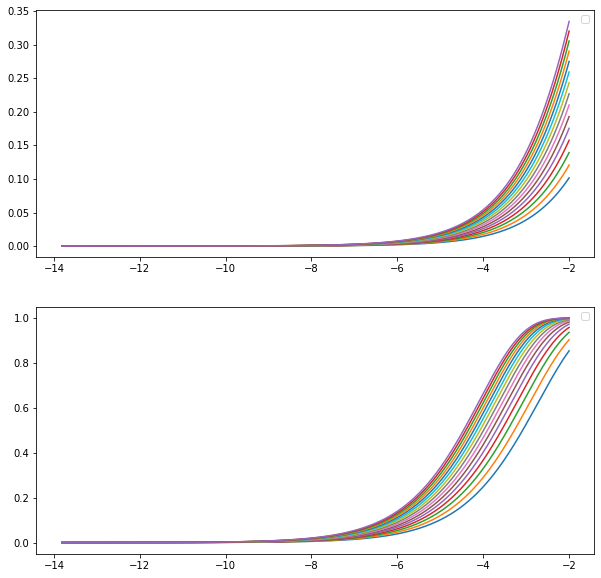

In [698]:
fig, axs = plt.subplots(2, 1, figsize=(10,10))
#axs[0].set_xlim([-6, -2])
#axs[1].set_xlim([-6, -2])

for i in range(len(low_v_1_sols)):
    axs[0].plot(np.log(t), low_v_1_sols[i])
axs[0].legend(loc = 'best')

for i in range(len(low_v_1_sols)):
    axs[1].plot(np.log(t), high_v_1_sols[i])
axs[1].legend(loc = 'best')


In [699]:
def c_long_timescale(mu, t):

    c = 1 - ((1e-3*fk_max)/(R_k*alpha_2)*(t - (1/alpha_2)*(1 - np.exp(-alpha_2*t)))) \
        - ((1e-3*v_2)/(v_1*(mu - 1)))

    return c

c_sols = []
t= np.linspace(0.01, 1, 10000)

for mu in mu_array:
    c = np.zeros_like(t)
    for i in range(len(t)):
        c[i] = c_long_timescale(mu, t[i])
    c_sols.append(c)


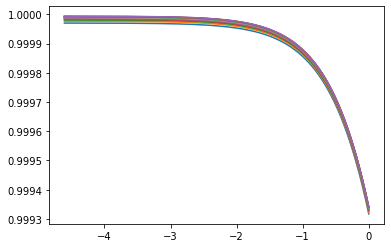

In [700]:
for i in range(len(c_sols)):
    plt.plot(np.log(t), c_sols[i])

plt.show()

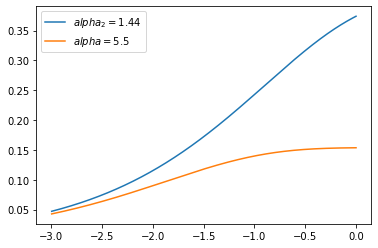

In [701]:
"""gamma = epsilon"""

def r_long_time_scale(t, alpha_2):

    theta = 1 + alpha_2
    r = (1/(1 + alpha_2))*(1 - np.exp(-theta*t))
    
    return r

alpha_2_params = [1.44, 5.5]
r_sols = []
t= np.linspace(0.05, 1, 10000)

for alpha_2 in alpha_2_params:
    r = np.ones_like(t)
    for i in range(len(t)):
       r[i] = r_long_time_scale(t[i], alpha_2)
    r_sols.append(r)

plt.plot(np.log(t), r_sols[0], label = '$ alpha_2 = 1.44$')
plt.plot(np.log(t), r_sols[1],label = '$ alpha = 5.5$')
plt.legend(loc = 'best')


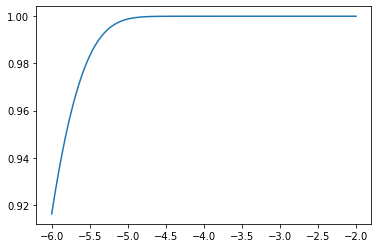

In [702]:
"""gamma = epsilon^2"""

def r_short_time_scale(t):

    r = 1 - np.exp(-t/1e-3)

    return r 

t= np.linspace(np.exp(-6), np.exp(-2), 10000)
r = []

for i in range(len(t)):
    r.append(r_short_time_scale(t[i]))

plt.plot(np.log(t), r)
plt.show()

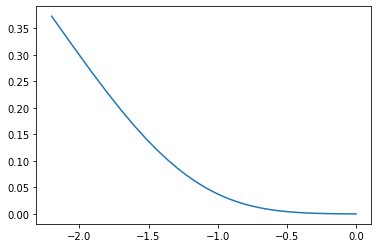

In [703]:
def c_long_timescale(t, fk_max, R_k):

    c = np.exp((-(fk_max/(1 + R_k)))*t)

    return c

t = np.linspace(np.exp(-2.2), 1)
c = []

for i in range(len(t)):
    c.append(c_long_timescale(t[i], 9, 0.01))

plt.plot(np.log(t), c)
plt.show()